# LSTM sequence prediction
-----------------------
bert와 성능비교를 위해 간단하게 구성해본 LSTM

## Data load
----------------------

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import matthews_corrcoef
import numpy as np

C:\Users\SHIN-DESKTOP\Anaconda3\envs\KoreaUnivDeep_main\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SHIN-DESKTOP\Anaconda3\envs\KoreaUnivDeep_main\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\SHIN-DESKTOP\Anaconda3\envs\KoreaUnivDeep_main\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\SHIN-DESKTOP\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SHIN-DESKTOP\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future

In [2]:
import pandas as pd

df = pd.read_csv(".\\data\\cola_public\\raw\\in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
df.sample(10)

Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
7260,sks13,1,NaN,I run on the beach.
7880,ad03,1,NaN,Why did you kill Pegasus?
7135,sks13,1,NaN,She will put a picture of Bill on your desk be...
6415,d_98,1,NaN,John talked to any politician who is powerful.
4871,ks08,1,NaN,The video which I thought John told us you rec...
3793,ks08,0,*,John gave Tom a book a record.
1684,r-67,0,*,It was John's that I stole bike.
4510,ks08,0,*,"The president could not approve the bill, coul..."
984,bc01,0,*,The problem knows easily.
1838,r-67,1,NaN,That they spoke to the janitor about that robb...


In [3]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
220,The more people everyone who likes pays attent...,0
5513,That's a kindest answer that I ever heard.,0
23,We yelled Harry hoarse.,0
2783,Baseballs toss easily.,0
5796,I loved intensely the policeman with all my he...,0


In [4]:
sentences = df.sentence.values
labels = df.label.values
print(len(sentences), len(labels))

8551 8551


## Tokenize & data split
----------------------

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

t  = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))

단어 집합의 크기 : 5521


In [6]:
sequences = []

for sent in sentences:
    encoded = t.texts_to_sequences([sent])[0]
    #print(sent)
    #print(encoded)
    sequences.append(encoded)

print('학습에 사용할 샘플의 개수: {}'.format(len(sequences)))

학습에 사용할 샘플의 개수: 8551


In [7]:
max_len = max(len(l) for l in sequences)
sequences = sequence.pad_sequences(sequences, maxlen=max_len, padding='pre')
print(max_len)

42


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(sequences, labels, test_size=0.1, shuffle= True)

## Model
------------------

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 32, input_length=max_len))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())
hist = lstm_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 42, 32)            176672    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 229,973
Trainable params: 229,973
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\SHIN-DESKTOP\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7695 samples, validate on 856 samples
Epoch 1/50
7695/7695 [==============================] - 15s 2ms/step - loss: 0.6121 - acc: 0.7042 - val_loss: 0.6049 - val_acc: 0.7056
Epoch 2/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.6041 - acc: 0.7042 - val_loss: 0.6016 - val_acc: 0.7056
Epoch 3/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.5903 - acc: 0.7049 - val_loss: 0.5987 - val_acc: 0.7079
Epoch 4/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.5535 - acc: 0.7189 - val_loss: 0.6072 - val_acc: 0.6916
Epoch 5/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.5048 - acc: 0.7454 - val_loss: 0.6460 - val_acc: 0.6787
Epoch 6/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.4606 - acc: 0.7740 - val_loss: 0.6980 - val_acc: 0.6904
Epoch 7/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.4171 - acc: 0.7974 - val_loss: 0.7397 - val_acc: 0.6250
Epoch 8/

In [10]:
# Final evaluation of the model
scores = lstm_model.evaluate(x_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.05%


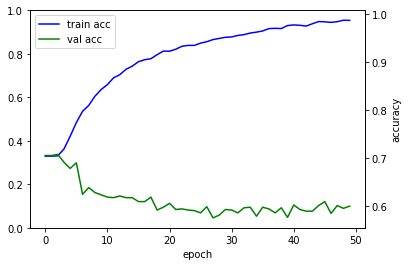

In [19]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

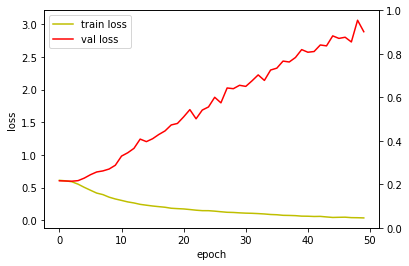

In [20]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

## Apply to the test dataset
---------------------

In [12]:
test_df = pd.read_csv(".\\data\\cola_public\\raw\\out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test_df.shape[0]))

# Create sentence and label lists
test_sentences = test_df.sentence.values
test_labels = test_df.label.values

test_sequences = []

for sent in test_sentences:
    encoded = t.texts_to_sequences([sent])[0]
    test_sequences.append(encoded)

print('테스트에 사용할 샘플의 개수: {}'.format(len(test_sequences)))

Number of test sentences: 516

테스트에 사용할 샘플의 개수: 516


In [13]:
max_len = max(len(l) for l in test_sequences)
max_len = 42
test_sequences = sequence.pad_sequences(test_sequences, maxlen=max_len, padding='pre')

In [14]:
# Final evaluation of the model
scores = lstm_model.evaluate(test_sequences, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 62.40%


## MCC score
----------------------------

In [16]:
predictions = lstm_model.predict(test_sequences)
for i in range(len(predictions)):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
    
predictions = np.squeeze(predictions)
print(predictions.shape)

(516,)


In [17]:
# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

print(test_labels.shape)
print(predictions.shape)

matthews = matthews_corrcoef(test_labels, predictions)
print('mcc score: {}'.format(matthews))

Calculating Matthews Corr. Coef. for each batch...
(516,)
(516,)
mcc score: 0.11545330290120216


## another model
------------------

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 32, input_length=max_len))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())
hist = lstm_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 42, 32)            176672    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 193,323
Trainable params: 193,323
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\SHIN-DESKTOP\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7695 samples, validate on 856 samples
Epoch 1/50
7695/7695 [==============================] - 13s 2ms/step - loss: 0.6092 - acc: 0.7014 - val_loss: 0.6045 - val_acc: 0.7056
Epoch 2/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.6020 - acc: 0.7042 - val_loss: 0.6021 - val_acc: 0.7056
Epoch 3/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.5824 - acc: 0.7064 - val_loss: 0.6133 - val_acc: 0.7044
Epoch 4/50
7695/7695 [==============================] - 11s 1ms/step - loss: 0.5425 - acc: 0.7261 - val_loss: 0.6201 - val_acc: 0.6799
Epoch 5/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.4974 - acc: 0.7530 - val_loss: 0.6719 - val_acc: 0.6297
Epoch 6/50
7695/7695 [==============================] - 12s 2ms/step - loss: 0.4520 - acc: 0.7754 - val_loss: 0.6743 - val_acc: 0.6449
Epoch 7/50
7695/7695 [==============================] - 12s 1ms/step - loss: 0.4146 - acc: 0.7964 - val_loss: 0.7285 - val_acc: 0.6577
Epoch 8/

In [22]:
# Final evaluation of the model
scores = lstm_model.evaluate(x_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 61.33%
